# Week 10: Birhan Energies

# Task 01: Finding key events that have significantly impacted Brent oil prices over the past decade.

C:\Users\bethelhem.teka\AppData\Local\Temp\ipykernel_16344\2660626347.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")



Key Events Impacting Brent Oil Prices (2015-2025):
                                 Event       Date  Price Before ($)  \
0             Oil Price Bottoms at $27 2016-02-11             29.64   
1  Brent Peaks at $86 (Iran Sanctions) 2018-10-03             85.63   
2          COVID-19 Oil Price Collapse 2020-04-20             19.75   
3                   Russia-Ukraine War 2022-02-24             99.29   

   Price After ($)  Change ($)  Change (%)  
0            28.82       -0.82       -2.77  
1            85.45       -0.18       -0.21  
2            17.36       -2.39      -12.10  
3           101.29        2.00        2.01  


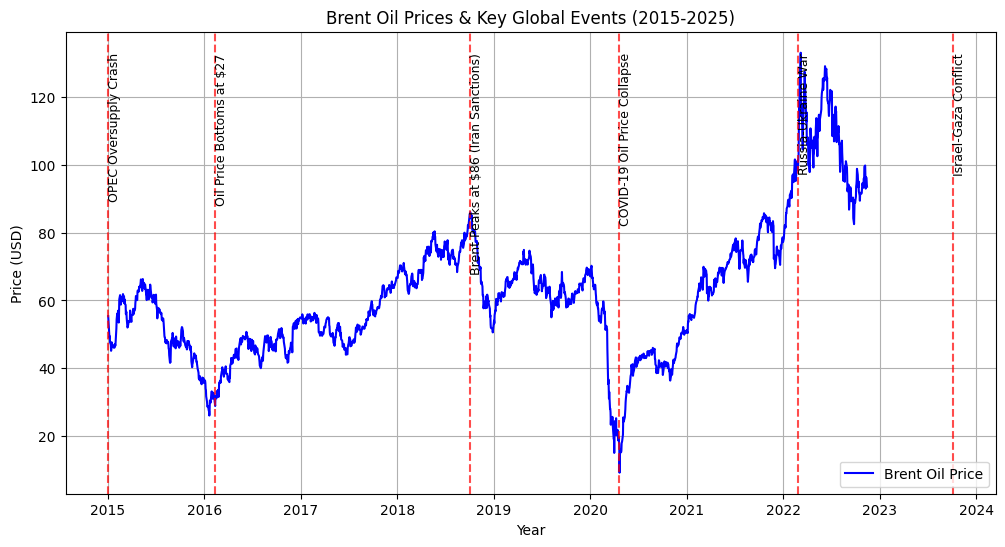

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "BrentOilPrices.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Drop any rows with missing dates
df = df.dropna(subset=["Date"])

# Filter for the last decade (2015-2025)
df = df[df["Date"] >= "2015-01-01"]

# Key events impacting oil prices
key_events = {
    "2015-01-01": "OPEC Oversupply Crash",
    "2016-02-11": "Oil Price Bottoms at $27",
    "2018-10-03": "Brent Peaks at $86 (Iran Sanctions)",
    "2020-04-20": "COVID-19 Oil Price Collapse",
    "2022-02-24": "Russia-Ukraine War",
    "2023-10-07": "Israel-Gaza Conflict"
}



# Task 02: Measuring how much these events affect price changes.

In [ ]:
# Measure price impact of key events
impact_analysis = []
for date, event in key_events.items():
    date = pd.to_datetime(date)
    before = df[df["Date"] < date].tail(1)  # Last price before event
    after = df[df["Date"] >= date].head(1)  # First price after event

    if not before.empty and not after.empty:
        price_before = before["Price"].values[0]
        price_after = after["Price"].values[0]
        change = price_after - price_before
        percent_change = (change / price_before) * 100

        impact_analysis.append({
            "Event": event,
            "Date": date,
            "Price Before ($)": round(price_before, 2),
            "Price After ($)": round(price_after, 2),
            "Change ($)": round(change, 2),
            "Change (%)": round(percent_change, 2)
        })

# Convert to DataFrame
impact_df = pd.DataFrame(impact_analysis)




# Task 03: Providing clear, data-driven insights to guide investment strategies, policy development, and operational planning.


Key Events Impacting Brent Oil Prices (2015-2025):
                                 Event       Date  Price Before ($)  \
0             Oil Price Bottoms at $27 2016-02-11             29.64   
1  Brent Peaks at $86 (Iran Sanctions) 2018-10-03             85.63   
2          COVID-19 Oil Price Collapse 2020-04-20             19.75   
3                   Russia-Ukraine War 2022-02-24             99.29   

   Price After ($)  Change ($)  Change (%)  
0            28.82       -0.82       -2.77  
1            85.45       -0.18       -0.21  
2            17.36       -2.39      -12.10  
3           101.29        2.00        2.01  


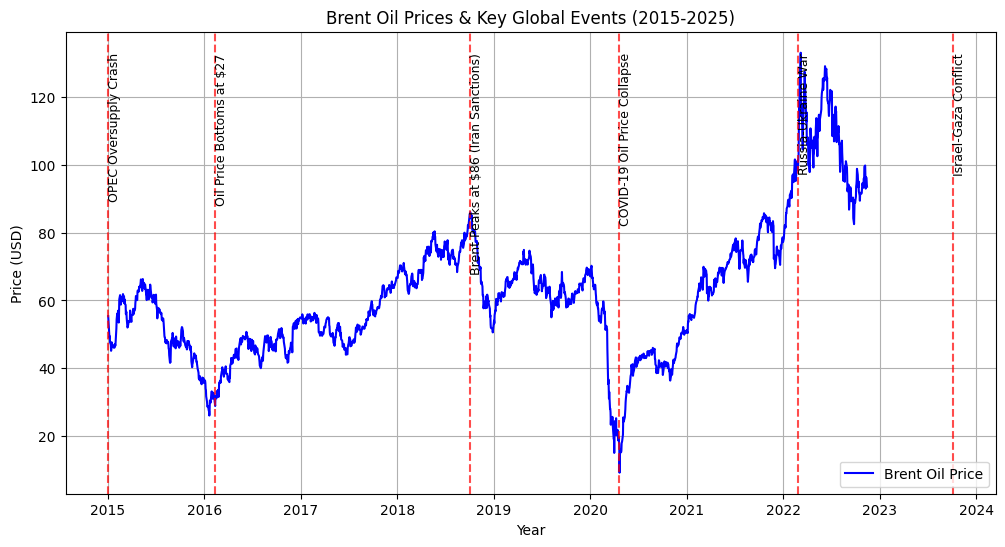

In [2]:
# Display impact analysis
print("\nKey Events Impacting Brent Oil Prices (2015-2025):")
print(impact_df)

# Plot price trend with key events
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Price"], label="Brent Oil Price", color="blue")
for date, event in key_events.items():
    plt.axvline(pd.to_datetime(date), color="red", linestyle="--", alpha=0.7)
    plt.text(pd.to_datetime(date), df["Price"].max(), event, rotation=90, fontsize=9, verticalalignment="top")

plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title("Brent Oil Prices & Key Global Events (2015-2025)")
plt.legend()
plt.grid(True)
plt.show()